<a href="https://colab.research.google.com/github/jeffvun/Machine-Learning-Labs/blob/main/Regression_Analysis_on_Type_II_Diabetes_Risk_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Analysis for Type II Diabetes Risk Factors**

In [ ]:
install.packages("caret")
install.packages("glmnet")
install.packages("haven")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load necessary libraries
library(haven)    # For reading Stata datasets
library(tidyr)    # For data manipulation
library(dplyr)    # For data manipulation and piping
library(ggplot2)  # For data visualization
library(caret)    # For model evaluation
library(glmnet)   # For Lasso regression


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



In [ ]:
# Load the dataset
data <- read_dta("/content/survey2019.dta")
# Data Exploration
summary(data)


       id            sex            age           marstatc         employ     
 Min.   :   8   Min.   :0.00   Min.   :16.00   Min.   :0.000   Min.   :0.000  
 1st Qu.: 900   1st Qu.:0.00   1st Qu.:36.00   1st Qu.:0.000   1st Qu.:0.000  
 Median :1873   Median :1.00   Median :50.00   Median :1.000   Median :1.000  
 Mean   :1930   Mean   :0.52   Mean   :50.22   Mean   :0.556   Mean   :0.538  
 3rd Qu.:2864   3rd Qu.:1.00   3rd Qu.:65.00   3rd Qu.:1.000   3rd Qu.:1.000  
 Max.   :3988   Max.   :1.00   Max.   :93.00   Max.   :1.000   Max.   :1.000  
      bmi           BP_diast           t2d            smoker     
 Min.   :17.25   Min.   : 47.00   Min.   :0.000   Min.   :0.000  
 1st Qu.:24.43   1st Qu.: 65.50   1st Qu.:0.000   1st Qu.:0.000  
 Median :27.47   Median : 72.00   Median :0.000   Median :0.000  
 Mean   :28.39   Mean   : 72.57   Mean   :0.058   Mean   :0.172  
 3rd Qu.:31.20   3rd Qu.: 79.00   3rd Qu.:0.000   3rd Qu.:0.000  
 Max.   :50.10   Max.   :119.50   Max.   :1.000   M

In [ ]:
str(data)

tibble [500 × 10] (S3: tbl_df/tbl/data.frame)
 $ id      : num [1:500] 98 1183 712 1206 230 ...
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ sex     : dbl+lbl [1:500] 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, ...
   ..@ label       : chr "Sex"
   ..@ format.stata: chr "%23.0g"
   ..@ labels      : Named num [1:2] 0 1
   .. ..- attr(*, "names")= chr [1:2] "Male" "Female"
 $ age     : dbl+lbl [1:500] 41, 17, 63, 21, 85, 21, 84, 74, 40, 63, 23, 92, 18, 66...
   ..@ label       : chr "Age last birthday"
   ..@ format.stata: chr "%8.0g"
   ..@ labels      : Named num [1:6] -9 -8 -7 -6 -2 -1
   .. ..- attr(*, "names")= chr [1:6] "Refused" "Don't know" "Refused/not obtained" "Schedule not obtained" ...
 $ marstatc: dbl+lbl [1:500] 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, ...
   ..@ label       : chr "Marital status"
   ..@ format.stata: chr "%47.0g"
   ..@ labels      : Named num [1:2] 0 1
   .. ..- attr(*, "names")= chr [1:2] "Currently not married" "Currently marri

In [ ]:
# Check for missing values
sum(is.na(data))


[1] 0

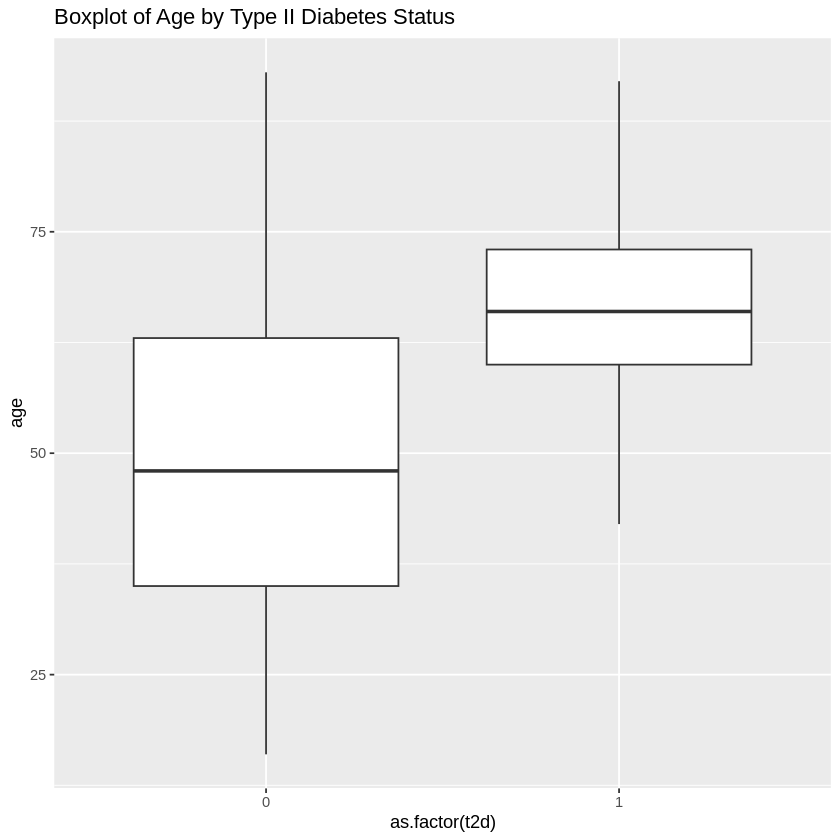

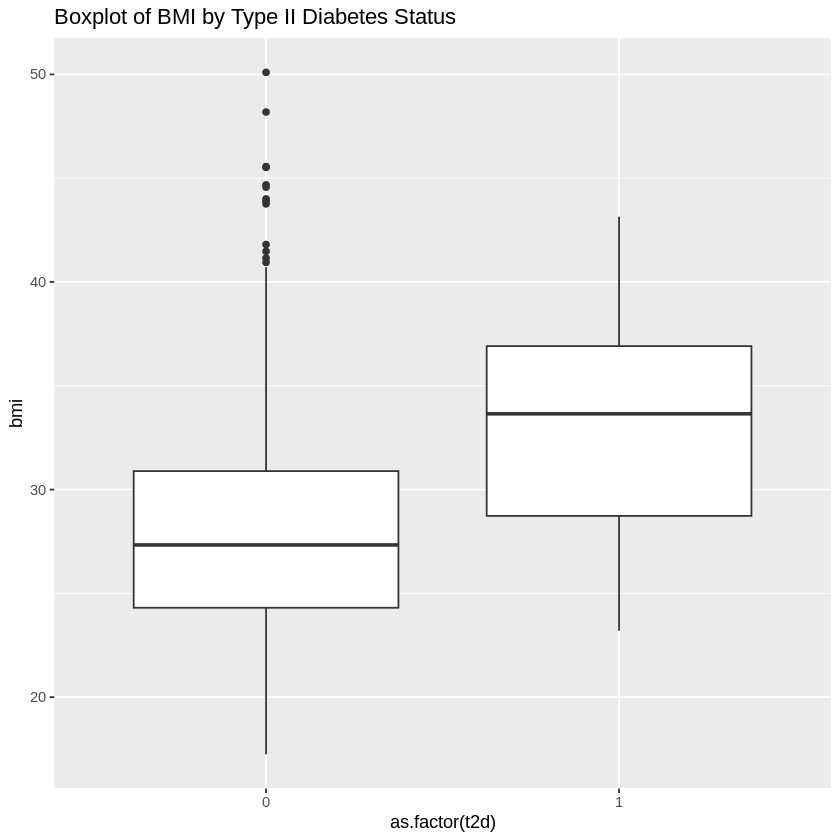

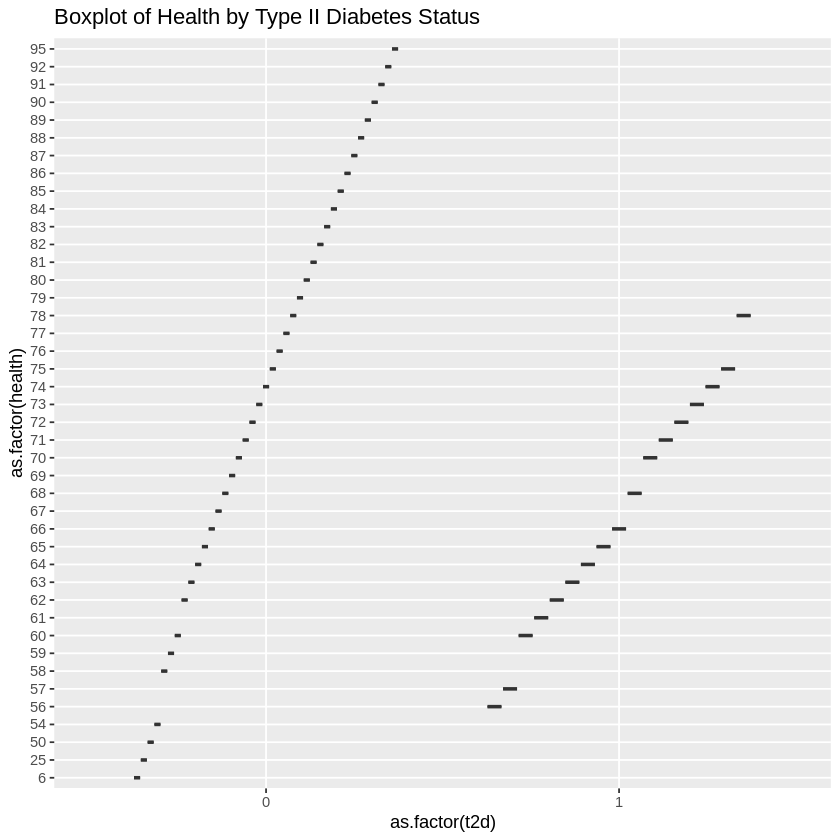

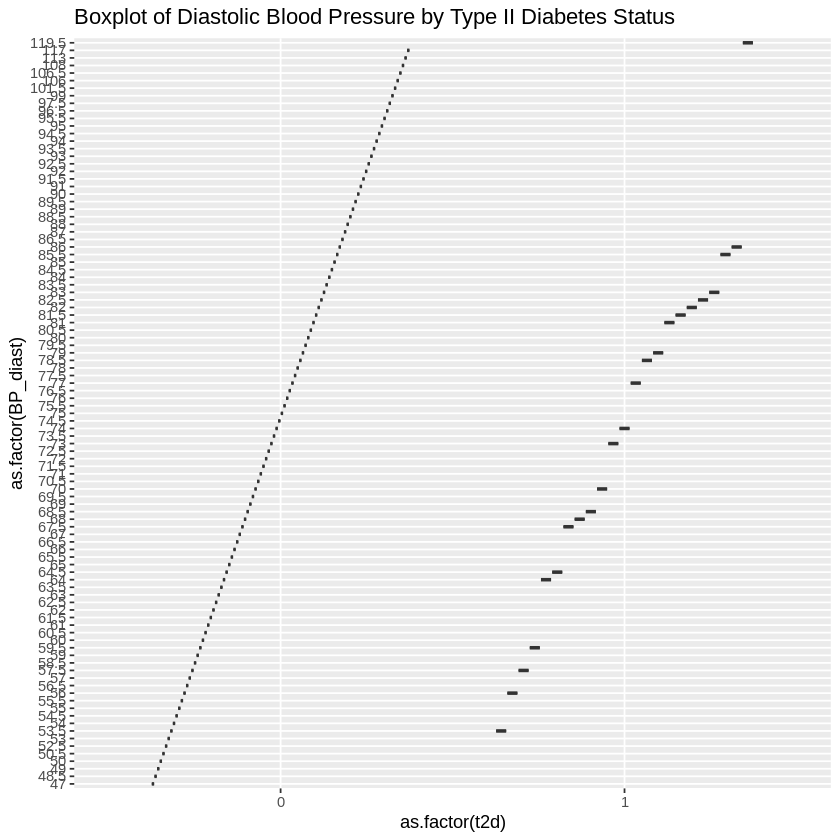

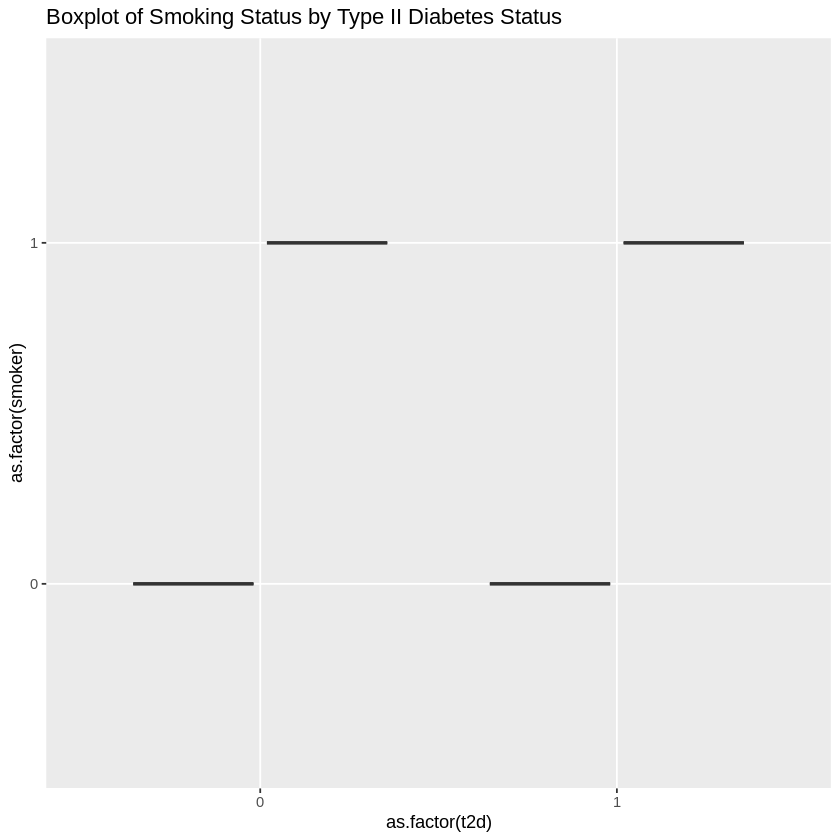

In [ ]:
# Explore relationships between variables and 't2d' using visualizations and summary statistics

# Boxplot for 'age'
ggplot(data, aes(x = as.factor(t2d), y = age)) +
  geom_boxplot() +
  ggtitle("Boxplot of Age by Type II Diabetes Status")

# Boxplot for 'bmi'
ggplot(data, aes(x = as.factor(t2d), y = bmi)) +
  geom_boxplot() +
  ggtitle("Boxplot of BMI by Type II Diabetes Status")

# Boxplot for 'health'
ggplot(data, aes(x = as.factor(t2d), y = as.factor(health))) +
  geom_boxplot() +
  ggtitle("Boxplot of Health by Type II Diabetes Status")

# Boxplot for 'BP_diast'
ggplot(data, aes(x = as.factor(t2d), y = as.factor(BP_diast))) +
  geom_boxplot() +
  ggtitle("Boxplot of Diastolic Blood Pressure by Type II Diabetes Status")

# Boxplot for 'smoker'
ggplot(data, aes(x = as.factor(t2d), y = as.factor(smoker))) +
  geom_boxplot() +
  ggtitle("Boxplot of Smoking Status by Type II Diabetes Status")


In [ ]:
# Summary statistics for each variable in relation to 't2d'

# 'sex'
cat("Summary statistics for Sex by Type II Diabetes Status:\n")
summary(data$sex)

# 'age'
cat("\nSummary statistics for Age by Type II Diabetes Status:\n")
summary(tapply(data$age, data$t2d, summary))

# 'marstatc'
cat("\nSummary statistics for Marital Status by Type II Diabetes Status:\n")
table(data$marstatc, data$t2d)

# 'employ'
cat("\nSummary statistics for Employment Status by Type II Diabetes Status:\n")
table(data$employ, data$t2d)

# 'bmi'
cat("\nSummary statistics for BMI by Type II Diabetes Status:\n")
summary(tapply(data$bmi, data$t2d, summary))

# 'BP_diast'
cat("\nSummary statistics for Diastolic Blood Pressure by Type II Diabetes Status:\n")
summary(tapply(data$BP_diast, data$t2d, summary))

# 'smoker'
cat("\nSummary statistics for Smoking Status by Type II Diabetes Status:\n")
table(data$smoker, data$t2d)

# 'health'
cat("\nSummary statistics for Health by Type II Diabetes Status:\n")
summary(tapply(data$health, data$t2d, summary))

Summary statistics for Sex by Type II Diabetes Status:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    1.00    0.52    1.00    1.00 


Summary statistics for Age by Type II Diabetes Status:


  Length Class          Mode   
0 6      summaryDefault numeric
1 6      summaryDefault numeric


Summary statistics for Marital Status by Type II Diabetes Status:


   
      0   1
  0 207  15
  1 264  14


Summary statistics for Employment Status by Type II Diabetes Status:


   
      0   1
  0 210  21
  1 261   8


Summary statistics for BMI by Type II Diabetes Status:


  Length Class          Mode   
0 6      summaryDefault numeric
1 6      summaryDefault numeric


Summary statistics for Diastolic Blood Pressure by Type II Diabetes Status:


  Length Class          Mode   
0 6      summaryDefault numeric
1 6      summaryDefault numeric


Summary statistics for Smoking Status by Type II Diabetes Status:


   
      0   1
  0 391  23
  1  80   6


Summary statistics for Health by Type II Diabetes Status:


  Length Class          Mode   
0 6      summaryDefault numeric
1 6      summaryDefault numeric

In [ ]:
# Variable Selection
# Based on EDA, select relevant variables for the regression model
selected_vars <- data %>%
  select(age, bmi, smoker, health, sex, marstatc, employ, BP_diast, t2d)

# Handle categorical variables
selected_vars <- selected_vars %>%
  mutate(sex = as.factor(sex),
         marstatc = as.factor(marstatc),
         employ = as.factor(employ))


In [ ]:
# Model Building
# Simple Linear Regression
model_1 <- glm(t2d ~ age, data = data, family = "binomial")

# Multiple Regression
model_2 <- glm(t2d ~ age + bmi + smoker + health, data = data, family = "binomial")

# Final Model
final_model <- glm(t2d ~ age + bmi + smoker + health + sex + marstatc + employ + BP_diast,
                   data = data, family = "binomial")


In [ ]:
# Model Evaluation
# Check model summary
summary(final_model)



Call:
glm(formula = t2d ~ age + bmi + smoker + health + sex + marstatc + 
    employ + BP_diast, family = "binomial", data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.68825    2.55951  -2.222 0.026256 *  
age          0.07898    0.02104   3.754 0.000174 ***
bmi          0.16981    0.03970   4.278 1.89e-05 ***
smoker       0.92354    0.62568   1.476 0.139931    
health      -0.12123    0.02445  -4.959 7.10e-07 ***
sex         -0.64217    0.48020  -1.337 0.181122    
marstatc    -0.11236    0.46069  -0.244 0.807319    
employ       0.21561    0.62543   0.345 0.730296    
BP_diast     0.02420    0.01819   1.330 0.183425    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 221.43  on 499  degrees of freedom
Residual deviance: 143.65  on 491  degrees of freedom
AIC: 161.65

Number of Fisher Scoring iterations: 7


In [ ]:
# Cross-validation with AUC as the metric
set.seed(123)
cv_model <- train(t2d ~ age + bmi + smoker + health + sex + marstatc + employ + BP_diast,
                  data = data,
                  method = "glmnet",
                  trControl = trainControl(method = "cv",
                                           classProbs = TRUE,
                                           summaryFunction = twoClassSummary,
                                           selectionFunction = "best",
                                           allowParallel = TRUE,
                                           verboseIter = TRUE,
                                           metric = "ROC"))
cv_model$results


ERROR: Error in trainControl(method = "cv", classProbs = TRUE, summaryFunction = twoClassSummary, : unused argument (metric = "ROC")


In [ ]:
# Predictions
predictions <- predict(final_model, newdata = selected_vars, type = "response")


In [ ]:
# Convert predictions to a factor with levels
predictions <- as.factor(predictions)

# Ensure 't2d' in selected_vars is a factor with the same levels as predictions
selected_vars$t2d <- factor(selected_vars$t2d, levels = levels(predictions))


In [ ]:
# Assess model performance
confusion_matrix <- confusionMatrix(predictions, selected_vars$t2d)
confusion_matrix


In [ ]:
# Extract coefficients
coefficients <- coef(final_model)


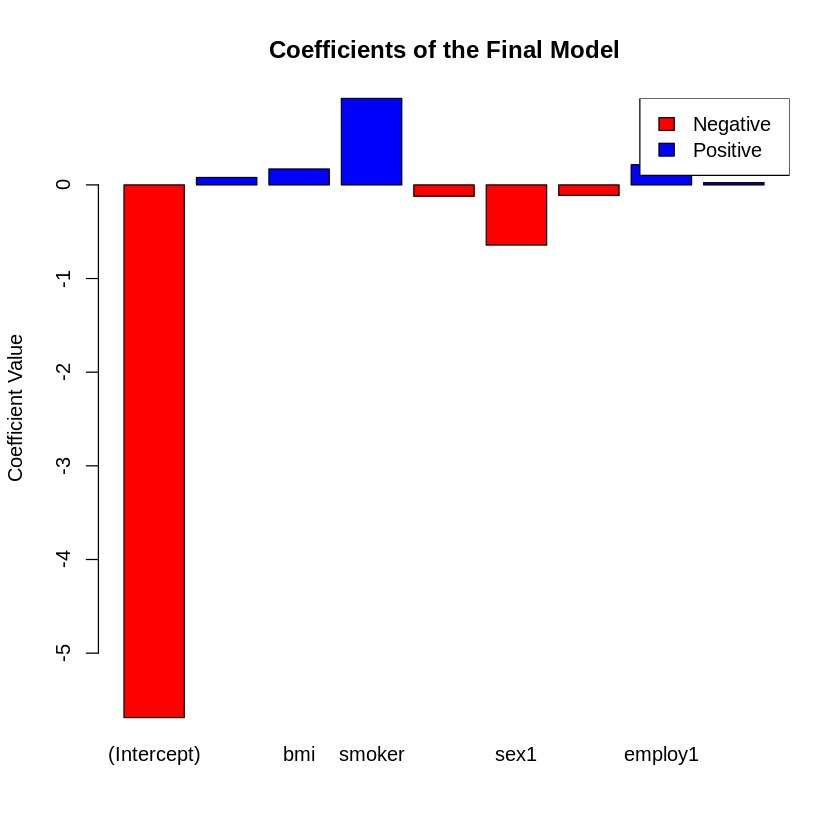

In [ ]:
# Visualize coefficients
coef_plot <- barplot(coefficients, col = ifelse(coefficients > 0, "blue", "red"),
                    main = "Coefficients of the Final Model", ylab = "Coefficient Value")
legend("topright", legend = c("Negative", "Positive"), fill = c("red", "blue"))


In [ ]:
# Save the R notebook output
sink("Regression_Model_Report.txt")
cat("# Regression Model Report\n\n")


# Regression Model Report



In [ ]:
# Include your analysis, interpretation, and findings here
sink()
